In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing the dataset
df=pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
# to see top 5 dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Exploratory Data Analysis

#### Before training the model, we need to observe and analyse the data.

In [4]:
# size of the dataset
df.shape

(1025, 14)

In [5]:
# checking the type of dataset
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
# Checking for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
# information on all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
# statistics on coloumn
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00
mean,54.43,0.70,0.94,131.61,246.00,0.15,0.53,149.11,0.34,1.07,1.39,0.75,2.32,0.51
std,9.07,0.46,1.03,17.52,51.59,0.36,0.53,23.01,0.47,1.18,0.62,1.03,0.62,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,132.00,0.00,0.00,1.00,0.00,2.00,0.00
50%,56.00,1.00,1.00,130.00,240.00,0.00,1.00,152.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,275.00,0.00,1.00,166.00,1.00,1.80,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [9]:
# Checking that whether data is balance or not
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

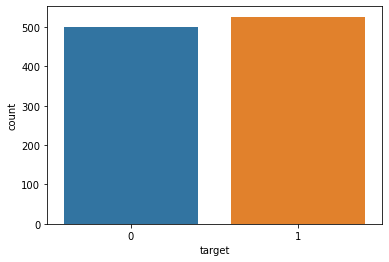

In [10]:
sns.countplot("target",data=df)

 We have 526 people with heart disease and 499 people without heart disease, so our dataset is balanced.

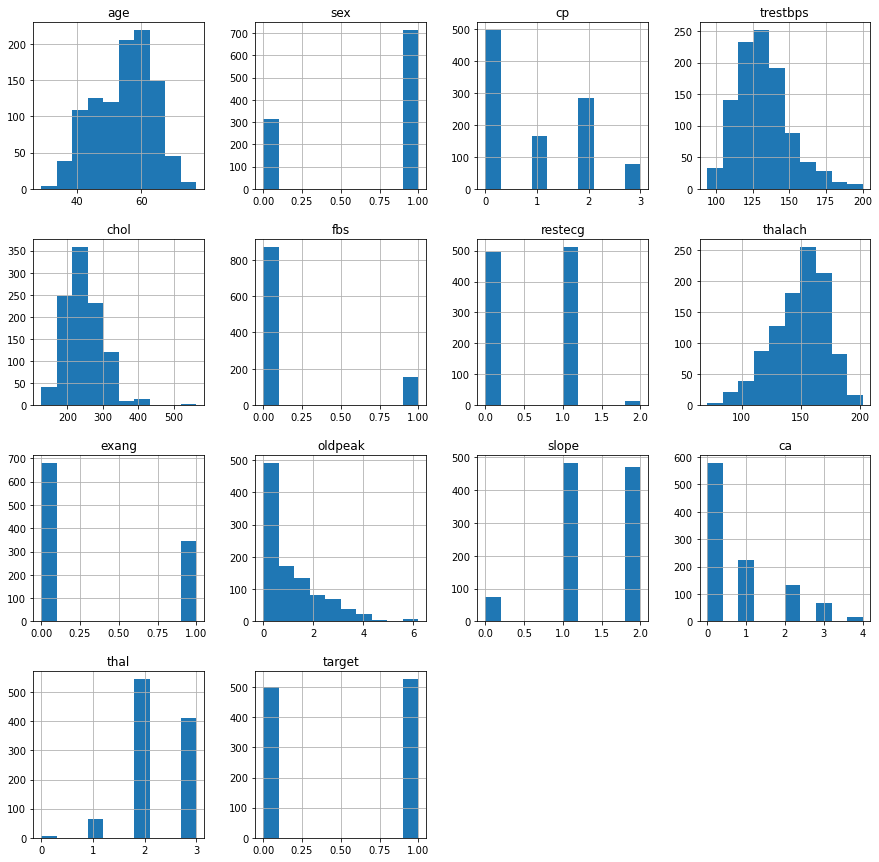

In [11]:
# Plotting histogram for the entire dataset
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
g = df.hist(ax=ax)

In [12]:
low_frequency = []
high_frequency = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        low_frequency.append(column)
    else:
        high_frequency.append(column)

age : [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
sex : [1 0]
cp : [0 1 2 3]
trestbps : [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
chol : [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237 224 265 313 340 259 270 216 264 276 322 214 273 253 176 284 305 168
 407 290 277 262 195 166 178 141]
fbs :

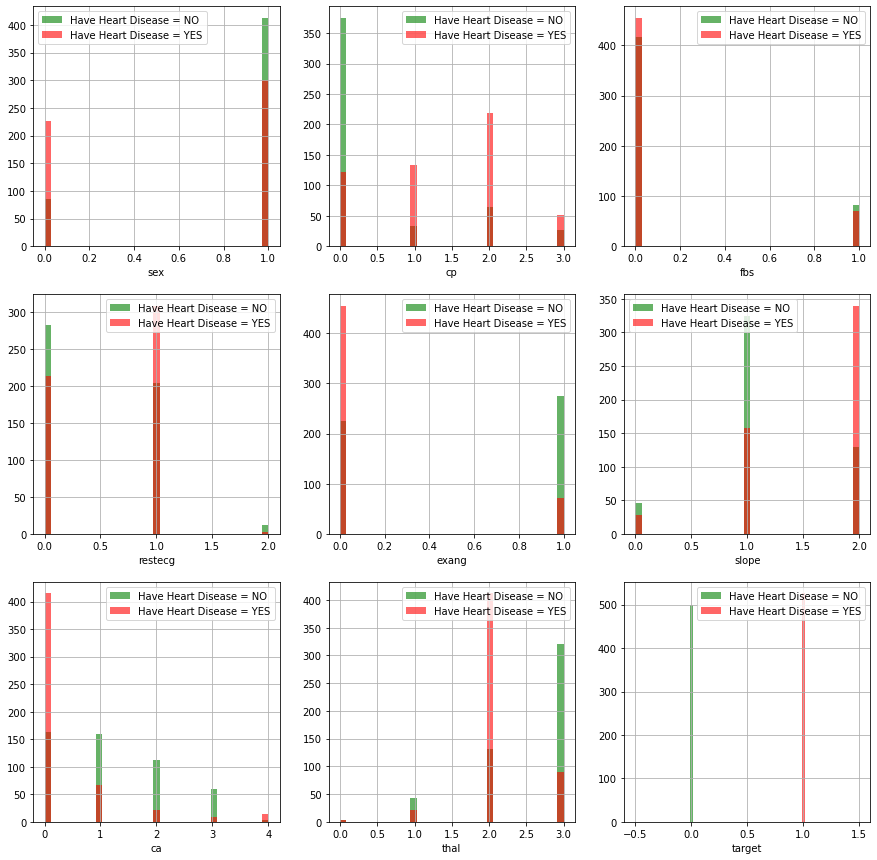

In [48]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(low_frequency, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 0][column].hist(bins=35, color='green', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

Observations from the above plot:

cp {Chest pain}: People with cp 1, 2, 3 are more likely to have heart disease than people with cp 0.

restecg : People with a value of 1 (reporting an abnormal heart rhythm, which can range from mild symptoms to severe problems)           are more likely to have heart disease.

exang : people with a value of 0 have more heart disease than people with a value of 1 

slope : People with a slope value of 2 are more likely to have heart disease than people with a slope value of 2 slope is 0 or         1.

ca : the more blood movement the better, so people with ca equal to 0 are more likely to have heart disease.

thal : People with a thal value of 2  are more likely to have heart disease.

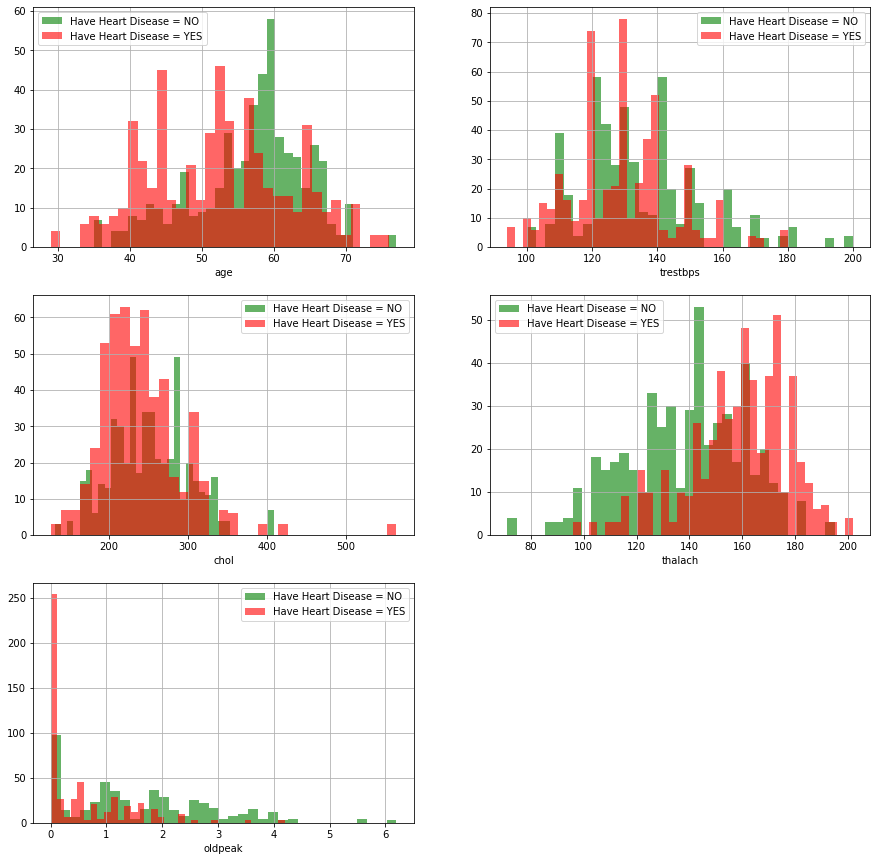

In [14]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(high_frequency, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 0][column].hist(bins=35, color='green', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

Observations from the above plot:

trestbps: resting blood pressure anything above 130-140 is generally of concern

chol: greater than 200 is of concern.

thalach: People with a maximum of over 150 are more likely to have heart disease.

the old peak of exercise-induced ST depression vs. rest looks at heart stress during exercise an unhealthy heart will stress more

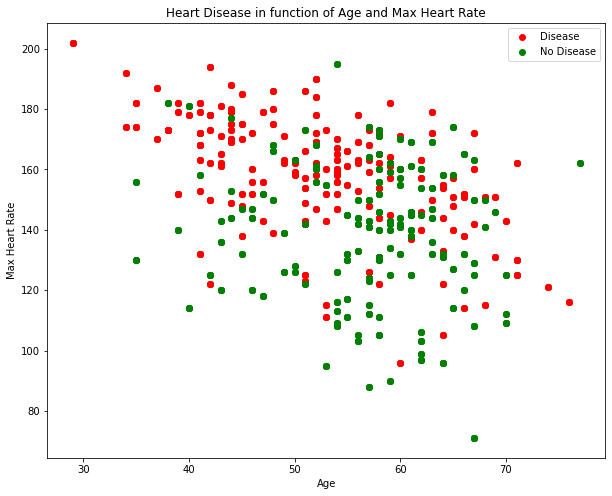

In [15]:
# Create another figure
plt.figure(figsize=(10, 8))

# Scatter with postivie examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="red")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="green")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

## Correlation Matrix

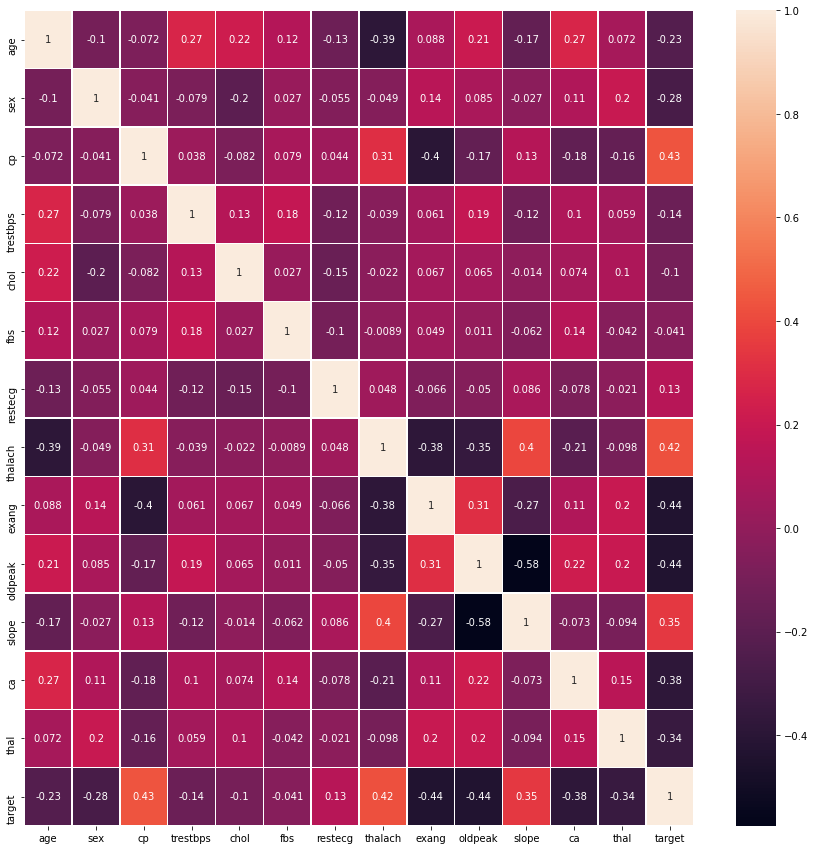

In [16]:
#  correlation matrix of dataset
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5)


<AxesSubplot:title={'center':'Correlation with target'}>

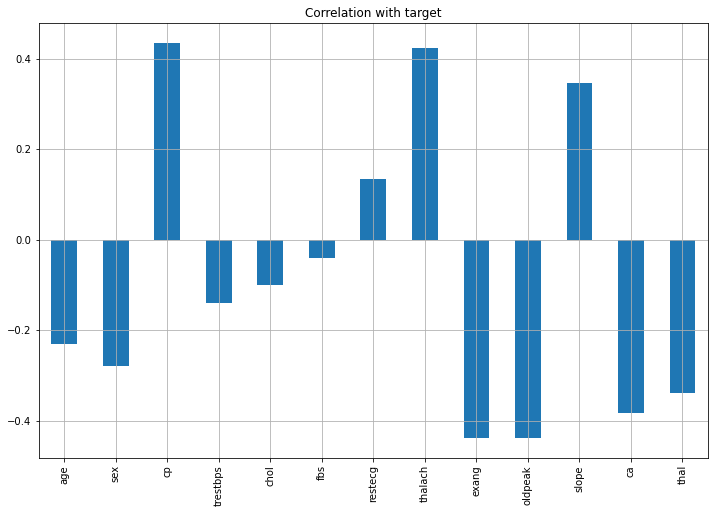

In [17]:

df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', figsize=(12, 8), grid=True,
                                                   title="Correlation with target")

Observations from correlation:

    1. fbs and chol are the least correlated with the target variable.
    
    2. All other variables have a significant correlation with the target variable.

## Data Preprocessing

The idea behind the StandardScaler is that variables that are measured at different scales do not contribute equally to the fit of the model and the learning function of the model and could end up creating a bias. 

So, to deal with this potential problem, we need to standardize the data (μ = 0, σ = 1) that is typically used before we integrate it into the machine learning model.

In [18]:
from sklearn.preprocessing import StandardScaler
standScaler = StandardScaler()
feature_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[feature_scale] = standScaler.fit_transform(df[feature_scale])

In [19]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.27,1,0,-0.38,-0.66,0,1,0.82,0,-0.06,2,2,3,0
1,-0.16,1,0,0.48,-0.83,1,0,0.26,1,1.73,0,0,3,0
2,1.72,1,0,0.76,-1.40,0,1,-1.05,1,1.30,0,0,3,0
3,0.72,1,0,0.94,-0.83,0,1,0.52,0,-0.91,2,1,3,0
4,0.83,0,0,0.36,0.93,1,1,-1.87,0,0.71,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.50,1,1,0.48,-0.48,0,1,0.65,1,-0.91,2,0,2,1
1021,0.61,1,0,-0.38,0.23,0,0,-0.35,1,1.47,1,1,3,0
1022,-0.82,1,0,-1.23,0.56,0,0,-1.35,1,-0.06,1,1,2,0
1023,-0.49,0,0,-1.23,0.16,0,0,0.43,0,-0.91,2,0,2,1


In [20]:
# spillting the dataset into features(independend variables) and target(dependent variables)
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [21]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.27,1,0,-0.38,-0.66,0,1,0.82,0,-0.06,2,2,3
1,-0.16,1,0,0.48,-0.83,1,0,0.26,1,1.73,0,0,3
2,1.72,1,0,0.76,-1.40,0,1,-1.05,1,1.30,0,0,3
3,0.72,1,0,0.94,-0.83,0,1,0.52,0,-0.91,2,1,3
4,0.83,0,0,0.36,0.93,1,1,-1.87,0,0.71,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.50,1,1,0.48,-0.48,0,1,0.65,1,-0.91,2,0,2
1021,0.61,1,0,-0.38,0.23,0,0,-0.35,1,1.47,1,1,3
1022,-0.82,1,0,-1.23,0.56,0,0,-1.35,1,-0.06,1,1,2
1023,-0.49,0,0,-1.23,0.16,0,0,0.43,0,-0.91,2,0,2


In [22]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

#  Model Buliding

I will be experimenting with 3 algorithim:

    1. Logistic Regression
    2. Naive Bayes
    2. Decision Tree Classifier
    3. Random Forest Classifier

##  1.  Logistic Regression

In [23]:
# spliting the dataset into features(independend variables) and target(dependent variables)
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [24]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.27,1,0,-0.38,-0.66,0,1,0.82,0,-0.06,2,2,3
1,-0.16,1,0,0.48,-0.83,1,0,0.26,1,1.73,0,0,3
2,1.72,1,0,0.76,-1.40,0,1,-1.05,1,1.30,0,0,3
3,0.72,1,0,0.94,-0.83,0,1,0.52,0,-0.91,2,1,3
4,0.83,0,0,0.36,0.93,1,1,-1.87,0,0.71,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.50,1,1,0.48,-0.48,0,1,0.65,1,-0.91,2,0,2
1021,0.61,1,0,-0.38,0.23,0,0,-0.35,1,1.47,1,1,3
1022,-0.82,1,0,-1.23,0.56,0,0,-1.35,1,-0.06,1,1,2
1023,-0.49,0,0,-1.23,0.16,0,0,0.43,0,-0.91,2,0,2


In [25]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [26]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [27]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='liblinear') #It is the default solver for Scikit-learn versions earlier than 0.22.0.
logmodel.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [28]:
# Predicting the Test set results
yp_pred = logmodel.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix
print("-------Confusion Matrix----")
confusion_matrix(y_test,yp_pred)

-------Confusion Matrix----


array([[117,  42],
       [ 21, 128]], dtype=int64)

In [30]:
# to find accuracy
from sklearn.metrics import accuracy_score
print('Accuracy in case of  Logistic regression: ',accuracy_score(y_test,yp_pred)*100)

Accuracy in case of  Logistic regression:  79.54545454545455


## 2. Naive Bayes

In [31]:
# Fitting Naive bayes to the Training set
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [32]:
# Predicting the Test set results
yp_pred = model.predict(X_test)

In [33]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
print("-------Confusion Matrix----")
confusion_matrix(y_test,yp_pred)

-------Confusion Matrix----


array([[118,  41],
       [ 16, 133]], dtype=int64)

In [34]:
# to find accuracy
from sklearn.metrics import accuracy_score
print('Accuracy in case of  Naive bayes: ',accuracy_score(y_test,yp_pred)*100)

Accuracy in case of  Naive bayes:  81.4935064935065


## 3. Decision Tree Classifier

In [35]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy',max_depth = 5, min_samples_leaf=7)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=7)

In [36]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [37]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
print("---Confusion Matrix")
cm = confusion_matrix(y_test, y_pred)
print(cm)

---Confusion Matrix
[[134  25]
 [ 14 135]]


In [38]:
# to find accuracy
from sklearn.metrics import accuracy_score
print('Accuracy in case of  DecisionTreeClassifier: ',accuracy_score(y_test,y_pred)*100)

Accuracy in case of  DecisionTreeClassifier:  87.33766233766234


In [39]:
# Decision Tree visualization-----------------
from sklearn import tree

[Text(1929.75, 3322.0, 'X[2] <= 0.5\nentropy = 0.998\nsamples = 717\nvalue = [340, 377]\nclass = 1'),
 Text(1046.25, 2718.0, 'X[11] <= 0.5\nentropy = 0.819\nsamples = 345\nvalue = [257, 88]\nclass = 0'),
 Text(697.5, 2114.0, 'X[12] <= 2.5\nentropy = 0.998\nsamples = 152\nvalue = [72, 80]\nclass = 1'),
 Text(372.0, 1510.0, 'X[10] <= 1.5\nentropy = 0.753\nsamples = 88\nvalue = [19, 69]\nclass = 1'),
 Text(186.0, 906.0, 'X[6] <= 0.5\nentropy = 0.968\nsamples = 43\nvalue = [17, 26]\nclass = 1'),
 Text(93.0, 302.0, 'entropy = 0.0\nsamples = 14\nvalue = [0, 14]\nclass = 1'),
 Text(279.0, 302.0, 'entropy = 0.978\nsamples = 29\nvalue = [17, 12]\nclass = 0'),
 Text(558.0, 906.0, 'X[4] <= 1.008\nentropy = 0.262\nsamples = 45\nvalue = [2, 43]\nclass = 1'),
 Text(465.0, 302.0, 'entropy = 0.0\nsamples = 38\nvalue = [0, 38]\nclass = 1'),
 Text(651.0, 302.0, 'entropy = 0.863\nsamples = 7\nvalue = [2, 5]\nclass = 1'),
 Text(1023.0, 1510.0, 'X[9] <= -0.359\nentropy = 0.662\nsamples = 64\nvalue = [53, 1

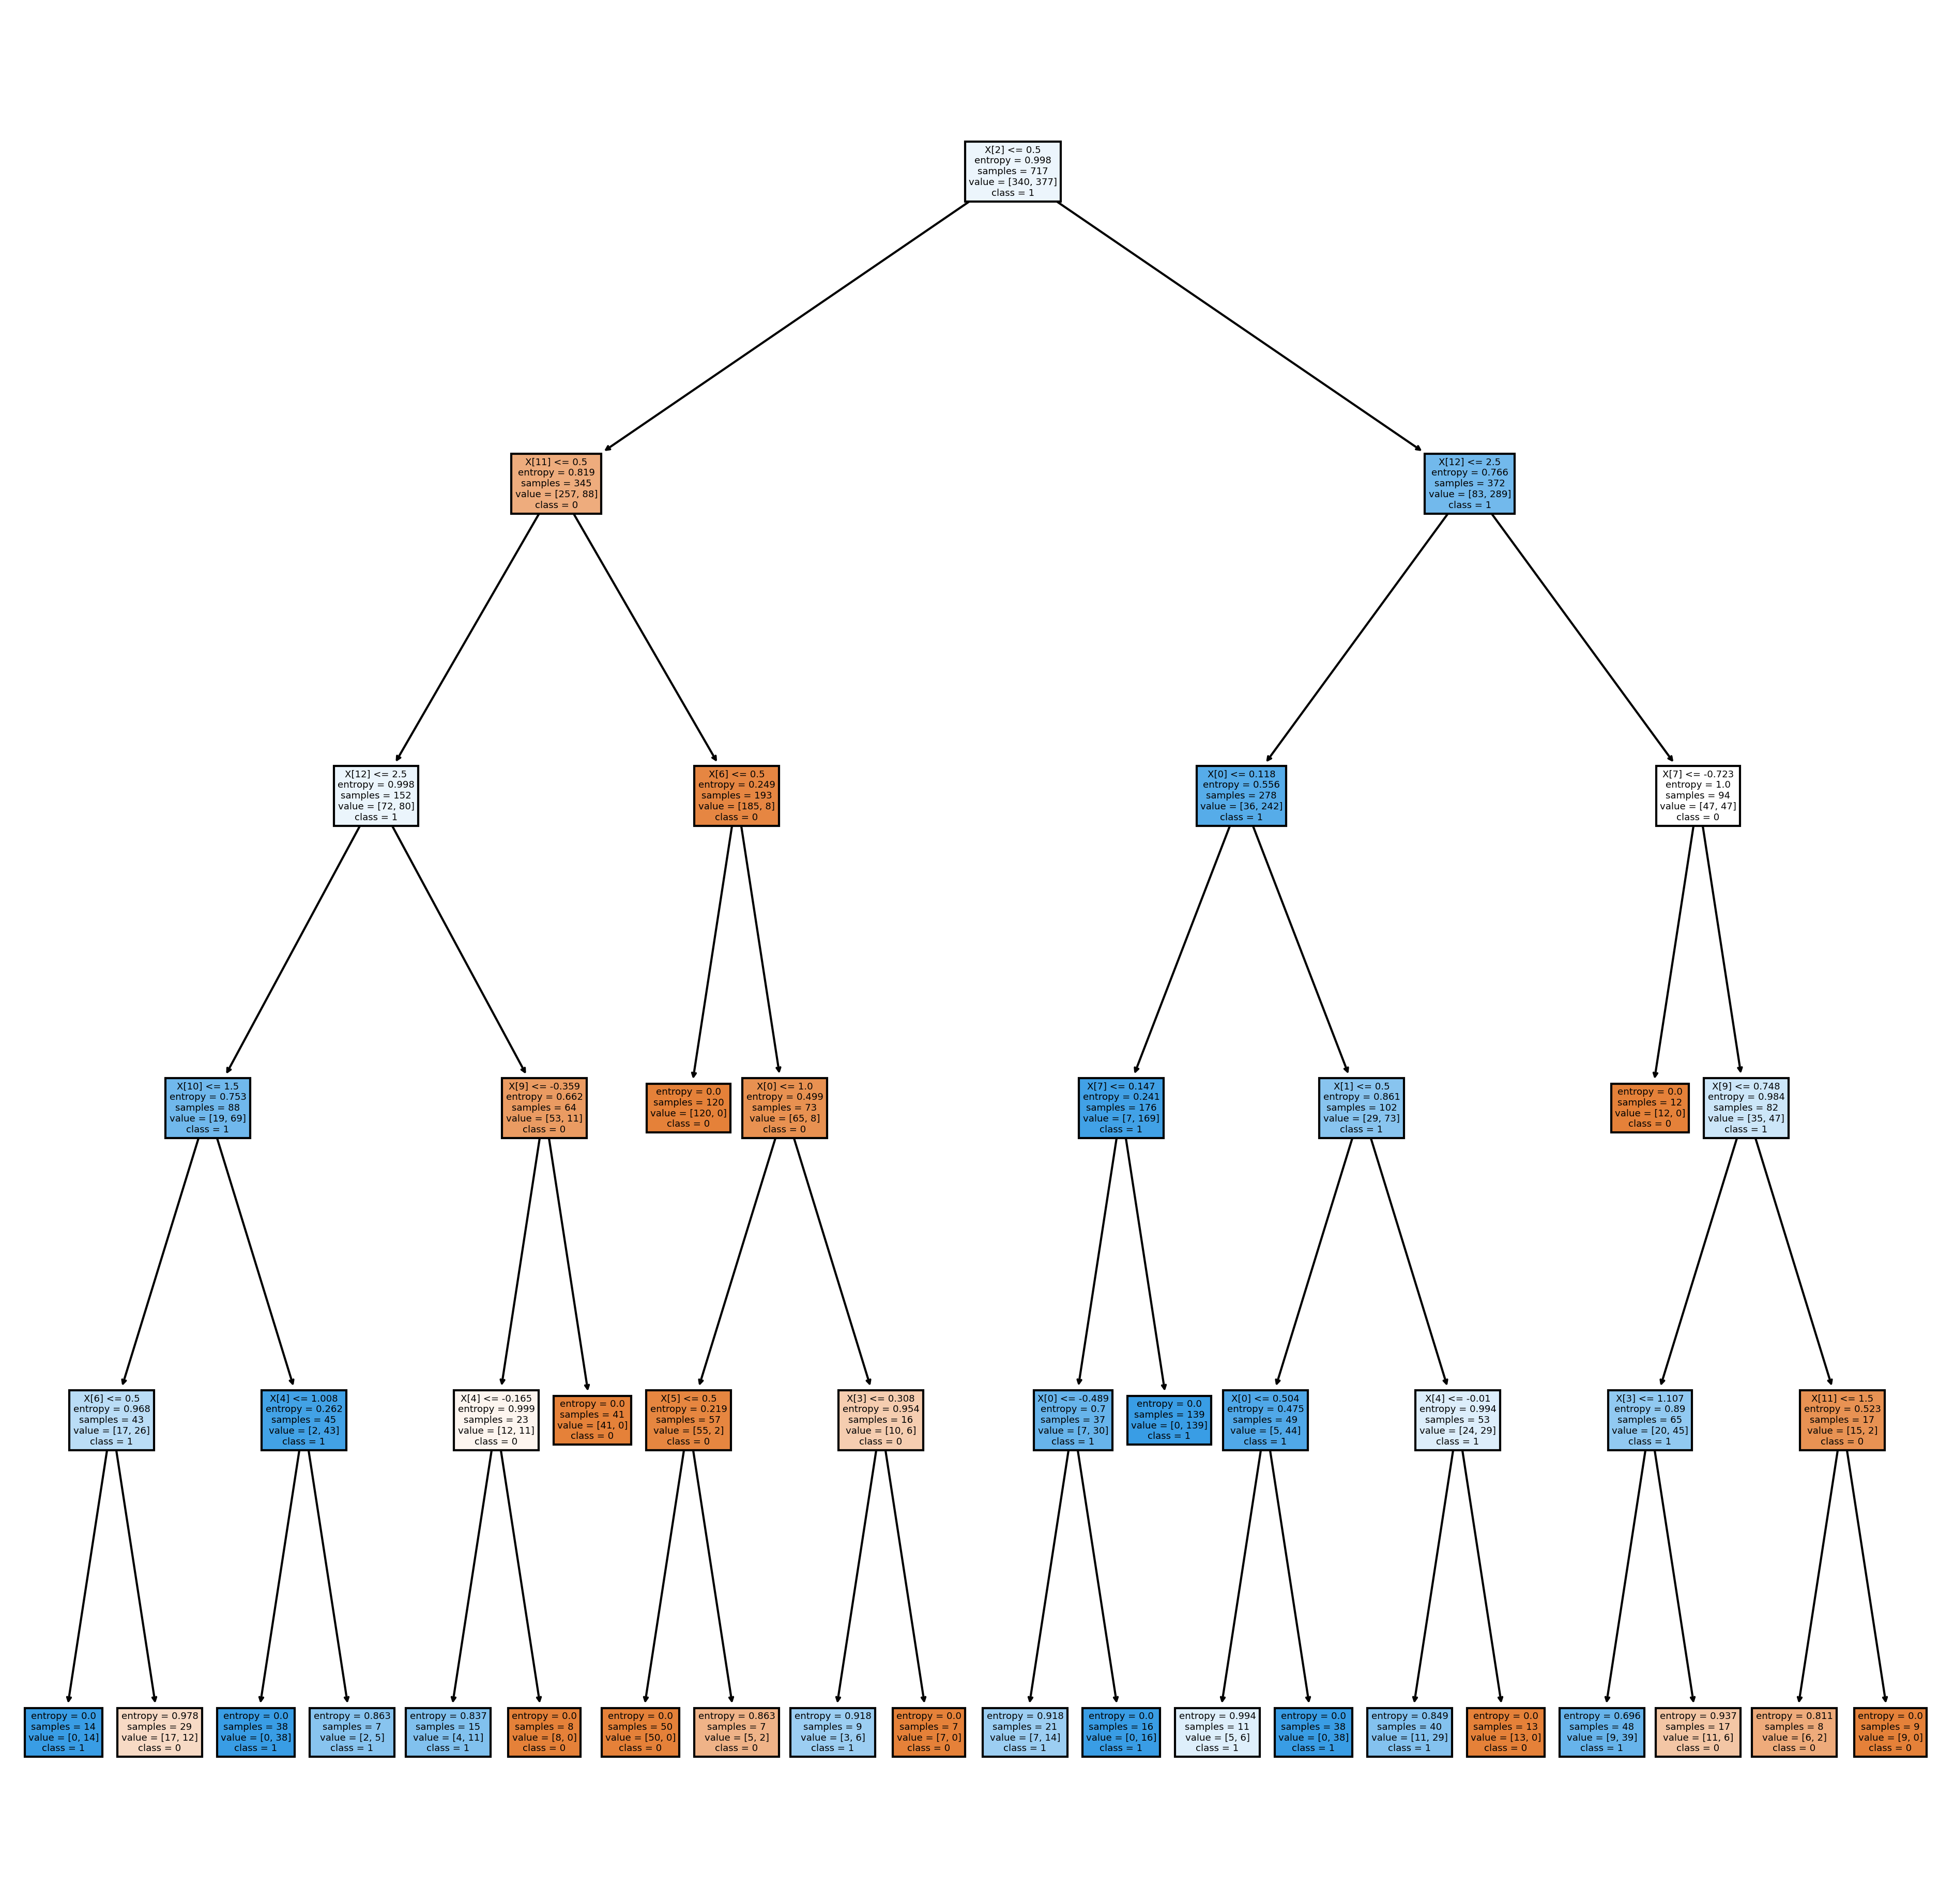

In [40]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (16,16), dpi=300)
#The above line is used to set the pixels of the Decision Trees nodes so that
#the content mentioned in each node of Decision tree is visible.
cn=['0','1']
tree.plot_tree(classifier,class_names=cn,filled = True)

Conclusion:

    no heart problem: if c.p(chest opain) < 0.5 and person is male and oldpeak > 0.529 and chol < 1.065 the person not 
                      suffering from heart diseases.
    heart problem: if c.p (chest pain) > 0.5 and oldpeak > 0.748 and slope < 0.5 then , then the person 
                    is having a heart diseases.
    There is a lots of condition possibile in

## 4. Random Forest Classifier

In [41]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy',max_depth = 8, min_samples_leaf=7)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=7,
                       n_estimators=10)

In [42]:
#To see no. of decision trees created
len(classifier.estimators_)

#To see the decision trees created
classifier.estimators_

#To access a particular decision tree, we can use indexing
classifier.estimators_[0]

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_features='auto',
                       min_samples_leaf=7, random_state=304324918)

In [43]:
# Predicting the Test set results
y_prediction = classifier.predict(X_test)

In [44]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[134,  25],
       [ 14, 135]], dtype=int64)

In [45]:
# to find accuracy
from sklearn.metrics import accuracy_score
print('Accuracy in case of  Random Forest Classifier: ',accuracy_score(y_test,y_prediction)*100)

Accuracy in case of  Random Forest Classifier:  88.96103896103897


 Random Forest visualization

Since RF is quite big & clumpsy to draw due to large no. of DT, its not possible to 
visualiza an entire RF on a small system like our laptop.
Hence, we visualize individual DTs from this RF.


[Text(496.0, 855.6666666666666, 'X[11] <= 0.5\nentropy = 0.986\nsamples = 467\nvalue = [308, 409]\nclass = 1'),
 Text(294.5, 755.0, 'X[12] <= 2.5\nentropy = 0.754\nsamples = 268\nvalue = [91, 329]\nclass = 1'),
 Text(155.0, 654.3333333333333, 'X[0] <= 0.338\nentropy = 0.458\nsamples = 188\nvalue = [28, 262]\nclass = 1'),
 Text(93.0, 553.6666666666666, 'X[0] <= -0.765\nentropy = 0.26\nsamples = 137\nvalue = [9, 196]\nclass = 1'),
 Text(62.0, 453.0, 'X[6] <= 0.5\nentropy = 0.391\nsamples = 79\nvalue = [9, 108]\nclass = 1'),
 Text(31.0, 352.33333333333326, 'entropy = 0.0\nsamples = 27\nvalue = [0, 43]\nclass = 1'),
 Text(93.0, 352.33333333333326, 'X[0] <= -1.426\nentropy = 0.534\nsamples = 52\nvalue = [9, 65]\nclass = 1'),
 Text(62.0, 251.66666666666663, 'entropy = 0.0\nsamples = 19\nvalue = [0, 29]\nclass = 1'),
 Text(124.0, 251.66666666666663, 'X[10] <= 1.5\nentropy = 0.722\nsamples = 33\nvalue = [9, 36]\nclass = 1'),
 Text(93.0, 151.0, 'entropy = 1.0\nsamples = 12\nvalue = [7, 7]\nclas

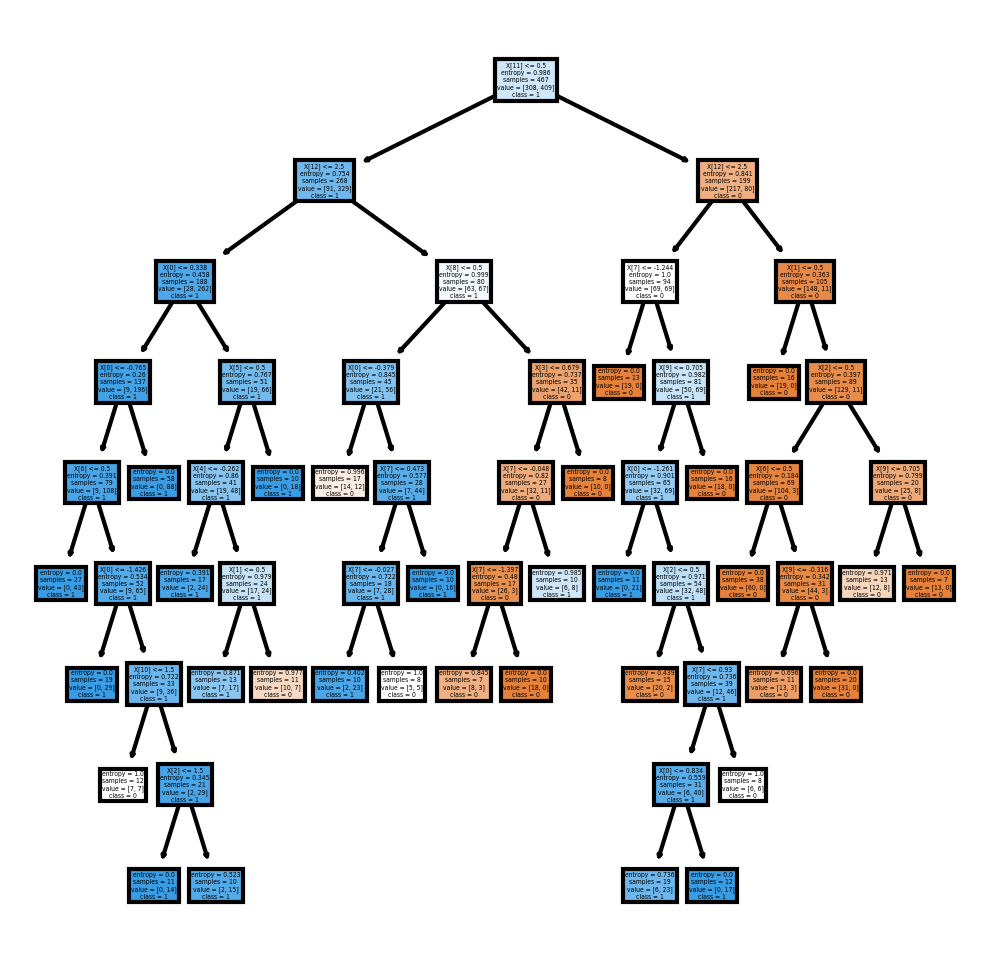

In [46]:
# Decision Tree -1 visualization-----------------
from sklearn import tree
#Lets create a blank chart of desired size using matplotlib library and place our Decision tree there.
import matplotlib.pyplot as plt
fig, axes= plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
cn=['0','1']
tree.plot_tree(classifier.estimators_[0],class_names=cn,filled = True)


[Text(509.4485294117647, 855.6666666666666, 'X[2] <= 0.5\nentropy = 0.999\nsamples = 447\nvalue = [347, 370]\nclass = 1'),
 Text(307.7205882352941, 755.0, 'X[7] <= 1.408\nentropy = 0.851\nsamples = 224\nvalue = [259, 99]\nclass = 0'),
 Text(280.36764705882354, 654.3333333333333, 'X[11] <= 0.5\nentropy = 0.773\nsamples = 212\nvalue = [259, 76]\nclass = 0'),
 Text(150.44117647058823, 553.6666666666666, 'X[12] <= 2.5\nentropy = 1.0\nsamples = 90\nvalue = [69, 67]\nclass = 0'),
 Text(54.705882352941174, 453.0, 'X[0] <= -1.096\nentropy = 0.785\nsamples = 51\nvalue = [18, 59]\nclass = 1'),
 Text(27.352941176470587, 352.33333333333326, 'entropy = 0.918\nsamples = 7\nvalue = [6, 3]\nclass = 0'),
 Text(82.05882352941177, 352.33333333333326, 'X[7] <= -1.114\nentropy = 0.672\nsamples = 44\nvalue = [12, 56]\nclass = 1'),
 Text(54.705882352941174, 251.66666666666663, 'entropy = 0.971\nsamples = 7\nvalue = [6, 4]\nclass = 0'),
 Text(109.41176470588235, 251.66666666666663, 'X[0] <= 0.559\nentropy = 0

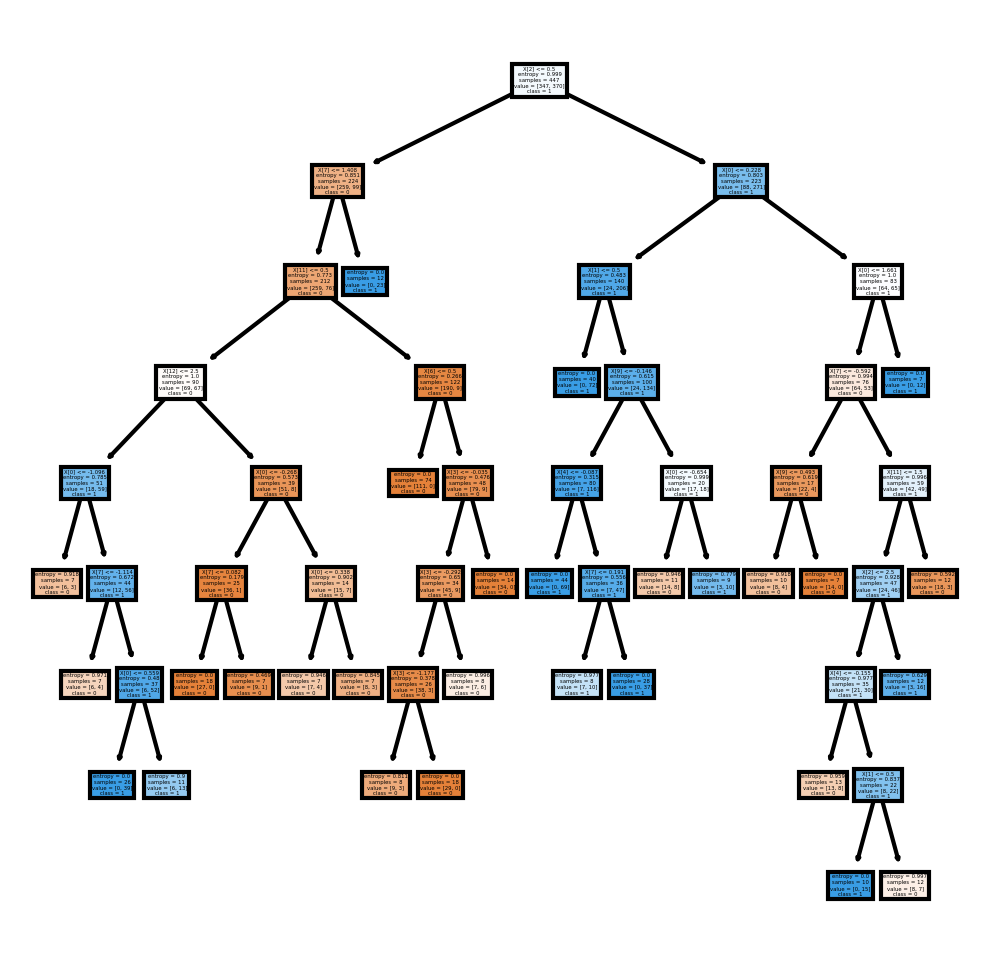

In [47]:
# Decision Tree-2 visualization-----------------
from sklearn import tree
#Lets create a blank chart of desired size using matplotlib library and place our Decision tree there.
import matplotlib.pyplot as plt
fig, axes= plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
cn=['0','1']
tree.plot_tree(classifier.estimators_[1],class_names=cn,filled = True)